### Noisy operations
* **Coherent noise** is described by unitary operations that maintain the purity of the output quantum state. E.g. over-rotation
* **Incoherent noise** due entangled with the environment, resulting in mixed states — probability distributions over different pure states. Incoherent noise thus leads to outputs that are always random, regardless of what basis we measure in.

* Mixed states are described by density matrices.
*  PennyLane’s **default.mixed** device is to provide native support for mixed states and for simulating noisy computations.
*   the @ symbol here is specific to quantum computing and is used to express the tensor product of operators

*   We ask the QNode to return the expectation value of  Z0 ⊗Z1
*   Incoherent noise is modelled by quantum channels. Mathematically, a quantum channel is a linear, completely positive, and trace-preserving (CPTP) map. A convenient strategy for representing quantum channels is to employ Kraus operators {Ki}
 


OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


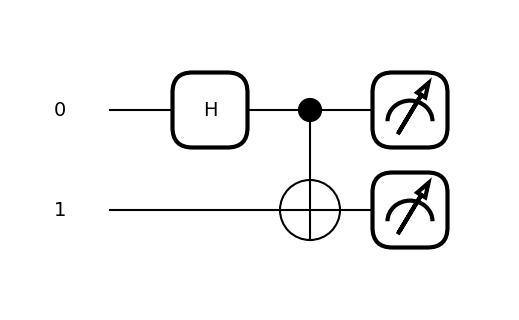

QNode EV=1.000


In [3]:
# Prepare Bell-state as density matrix
import pennylane as qml
from jax import numpy as np
import jax
import jaxopt
import matplotlib.pyplot as plt
qcstyle="black_white"

jax.config.update("jax_platform_name", "cpu")
jax.config.update('jax_enable_x64', True)

# dev == backend
dev = qml.device('default.mixed', wires=2) # density-matrix

#.....  state vector circuit .....
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    #qml.RX(0.3, 0)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

qml.draw_mpl(circuit, decimals=1, style=qcstyle)()
plt.show()
print("QNode EV=%.3f"%circuit() )

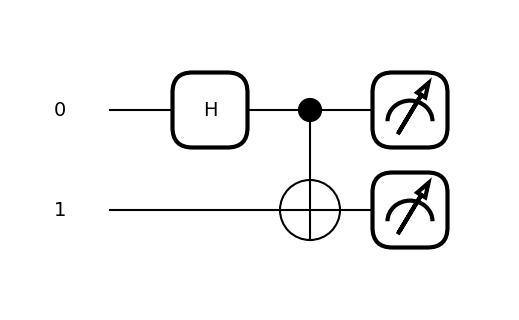

In [9]:
# build circuit returning shots
@qml.qnode(dev)
def circ2():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0,1])
qml.draw_mpl(circ2, decimals=1, style=qcstyle)()
plt.show()

In [10]:
print(circ2(shots=10))

[[1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]]


In [53]:
#.....  density matrix circuit .....
@qml.qnode(dev)
def density_matrix_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

rho = density_matrix_circuit()
print("Output density matrix is = \n",np.real(rho))

Output density matrix is = 
 [[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


QNode output for bit flip probability 0.001 is 0.996
QNode output for bit flip probability 0.01 is 0.960
QNode output for bit flip probability 0.1 is 0.640
QNode output for bit flip probability 0.2 is 0.360


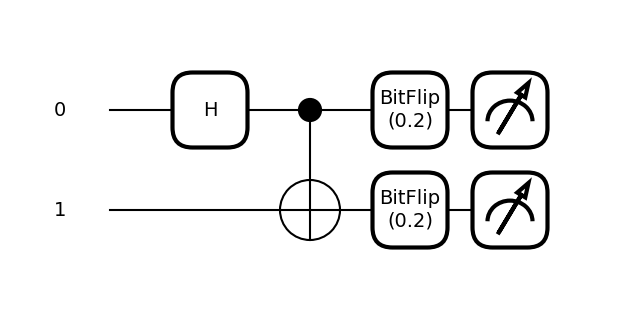

Output state for bit flip probability 0.2 is 
[[0.34 0.   0.   0.34]
 [0.   0.16 0.16 0.  ]
 [0.   0.16 0.16 0.  ]
 [0.34 0.   0.   0.34]]


In [62]:
# BIT-FLIP channel can be implemented in PennyLane using the qml.BitFlip operation.
@qml.qnode(dev)
def bitflip_circuit(p):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.BitFlip(p, wires=0)
    qml.BitFlip(p, wires=1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


ps = [0.001, 0.01, 0.1, 0.2]
for p in ps:
    print(f"QNode output for bit flip probability {p} is {bitflip_circuit(p):.3f}")

qml.draw_mpl(bitflip_circuit, decimals=1, style=qcstyle)(p)
plt.show()
print(f"Output state for bit flip probability {p} is \n{np.real(dev.state)}")


### Noisy channles supported by PennyLane
BitFlip, PhaseFlip, AmplitudeDamping, GeneralizedAmplitudeDamping, PhaseDamping, and the DepolarizingChannel. You can also build your own custom channel using the operation QubitChannel by specifying its Kraus operators,

QNode output for depolarizing probability 0.001 is 0.9973
QNode output for depolarizing probability 0.01 is 0.9735
QNode output for depolarizing probability 0.1 is 0.7511
QNode output for depolarizing probability 0.2 is 0.5378


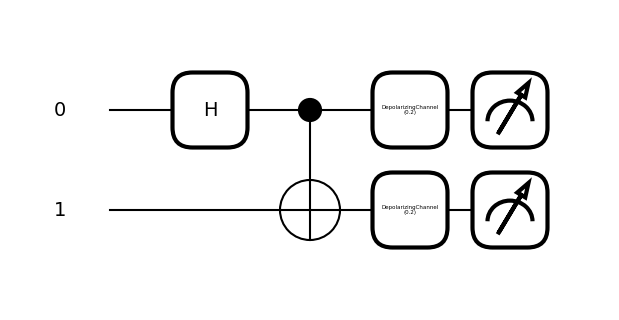

In [65]:
# explore depolarizing channel is a generalization of the bit flip and phase flip channels,  4 Kruas operators
@qml.qnode(dev)
def depolarizing_circuit(p):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.DepolarizingChannel(p, wires=0)
    qml.DepolarizingChannel(p, wires=1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


ps = [0.001, 0.01, 0.1, 0.2]
for p in ps:
    print(f"QNode output for depolarizing probability {p} is {depolarizing_circuit(p):.4f}")

qml.draw_mpl(depolarizing_circuit, decimals=1, style=qcstyle)(p)
plt.show()
